In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.lunar import LUNAR

normal_path = "fouriers/S01/1/Normal/q_data"
relay_path  = "fouriers/S01/1/Relay/q_data"

with h5py.File("datasets/fouriers_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    dataset_normal = np.zeros((10916, 72))
    dataset_relay  = np.zeros((9239, 72))

    for i in range(10916):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(9239):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:9916]
X_test_normal         = dataset_normal[9916:]
X_test_relay          = dataset_relay[8239:]
scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

neighbors 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.99      0.68      1000
       Relay       0.87      0.08      0.15      1000

    accuracy                           0.54      2000
   macro avg       0.70      0.54      0.41      2000
weighted avg       0.70      0.54      0.41      2000



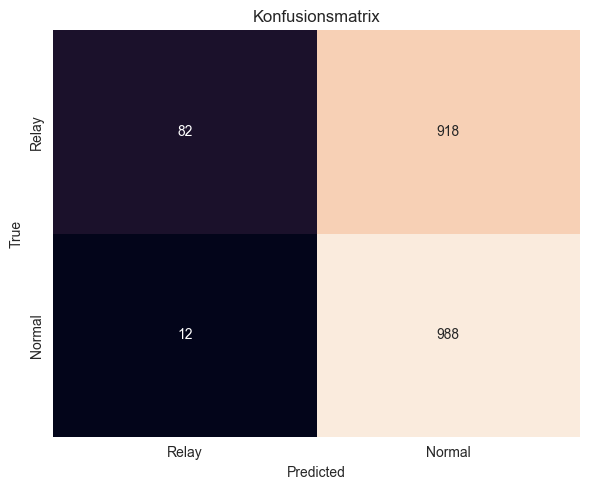

neighbors 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.98      0.68      1000
       Relay       0.81      0.09      0.16      1000

    accuracy                           0.53      2000
   macro avg       0.66      0.53      0.42      2000
weighted avg       0.66      0.53      0.42      2000



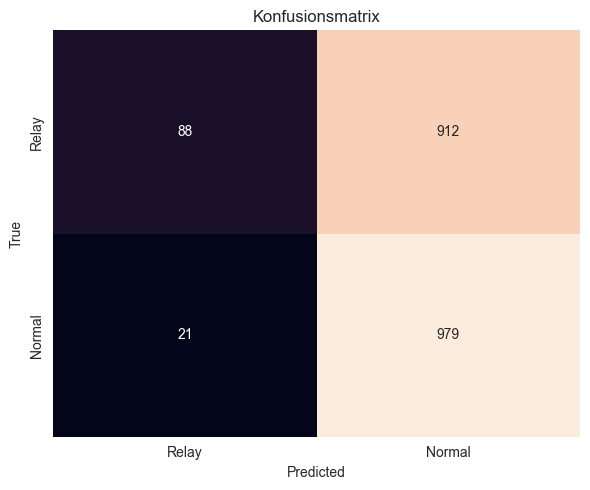

neighbors 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      1.00      0.68      1000
       Relay       0.94      0.07      0.12      1000

    accuracy                           0.53      2000
   macro avg       0.73      0.53      0.40      2000
weighted avg       0.73      0.53      0.40      2000



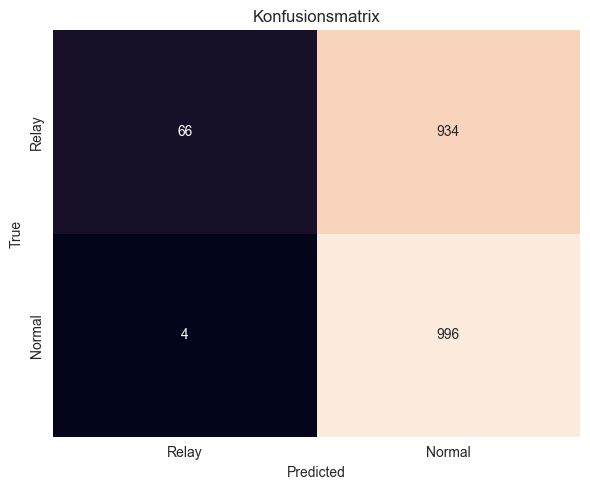

neighbors 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      1.00      0.68      1000
       Relay       0.97      0.07      0.13      1000

    accuracy                           0.53      2000
   macro avg       0.74      0.53      0.40      2000
weighted avg       0.74      0.53      0.40      2000



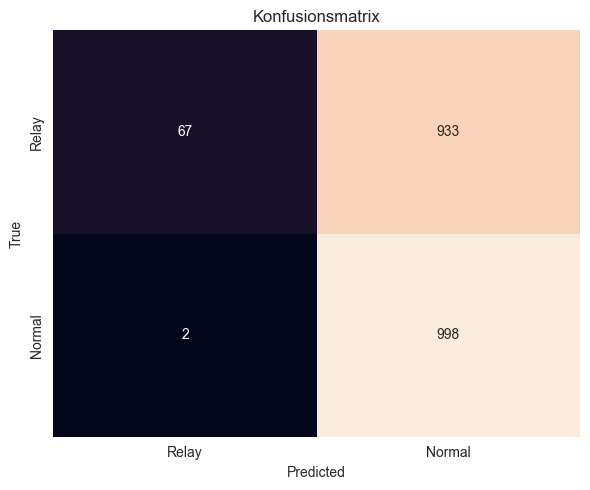

In [4]:
for n in {3,5,10,30}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, scaler=None)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"neighbors {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

neighbors 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      1000
       Relay       0.82      0.03      0.06      1000

    accuracy                           0.51      2000
   macro avg       0.66      0.51      0.37      2000
weighted avg       0.66      0.51      0.37      2000



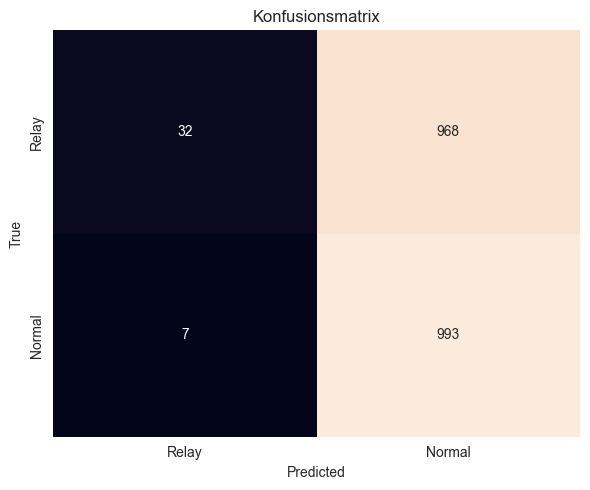

neighbors 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.98      0.67      1000
       Relay       0.69      0.04      0.08      1000

    accuracy                           0.51      2000
   macro avg       0.60      0.51      0.38      2000
weighted avg       0.60      0.51      0.38      2000



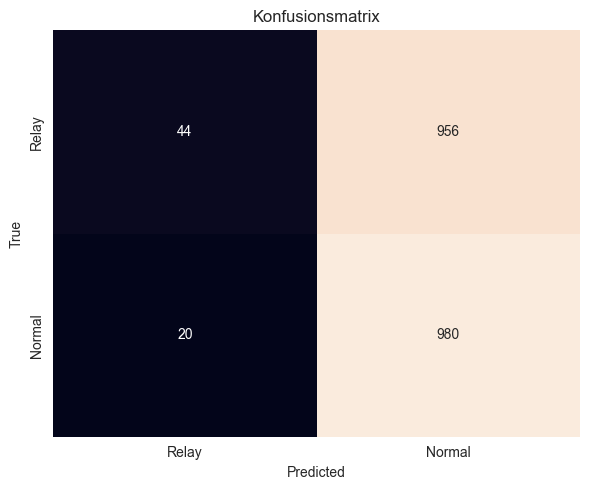

neighbors 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      1.00      0.67      1000
       Relay       0.90      0.03      0.05      1000

    accuracy                           0.51      2000
   macro avg       0.70      0.51      0.36      2000
weighted avg       0.70      0.51      0.36      2000



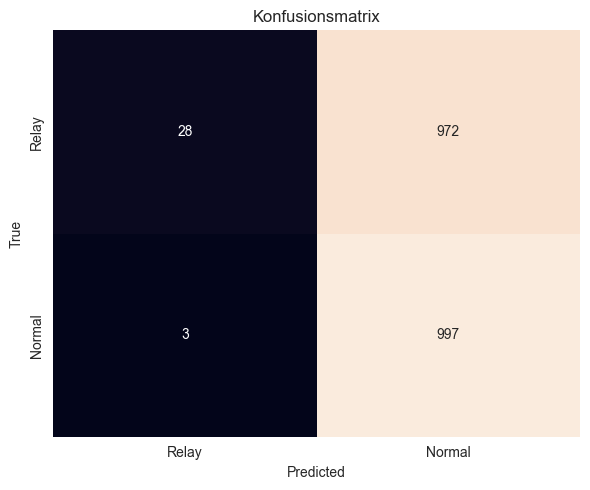

neighbors 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      1.00      0.67      1000
       Relay       1.00      0.02      0.04      1000

    accuracy                           0.51      2000
   macro avg       0.75      0.51      0.35      2000
weighted avg       0.75      0.51      0.35      2000



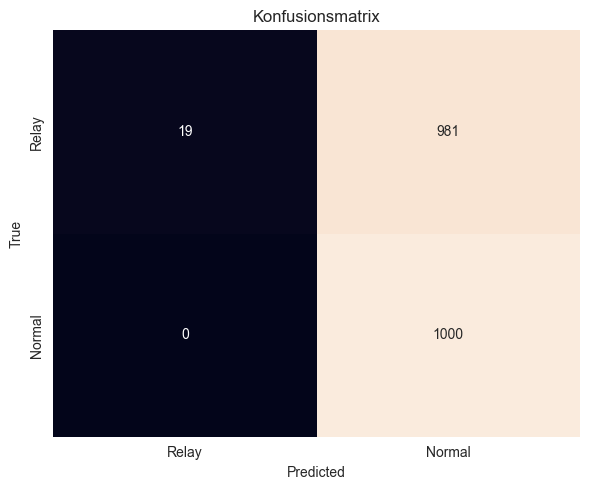

In [5]:
for n in {3,5,10,30}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, scaler=None)
    clf.fit(X_train_scaled_standard)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_standard)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"neighbors {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

neighbors 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.98      0.67      1000
       Relay       0.71      0.05      0.09      1000

    accuracy                           0.51      2000
   macro avg       0.61      0.51      0.38      2000
weighted avg       0.61      0.51      0.38      2000



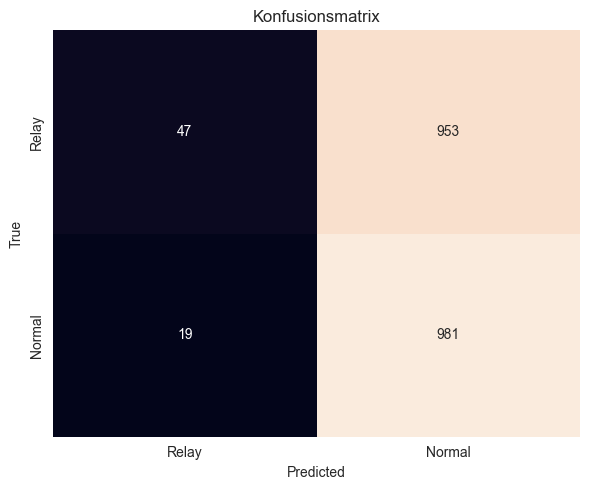

neighbors 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.97      0.67      1000
       Relay       0.65      0.05      0.09      1000

    accuracy                           0.51      2000
   macro avg       0.58      0.51      0.38      2000
weighted avg       0.58      0.51      0.38      2000



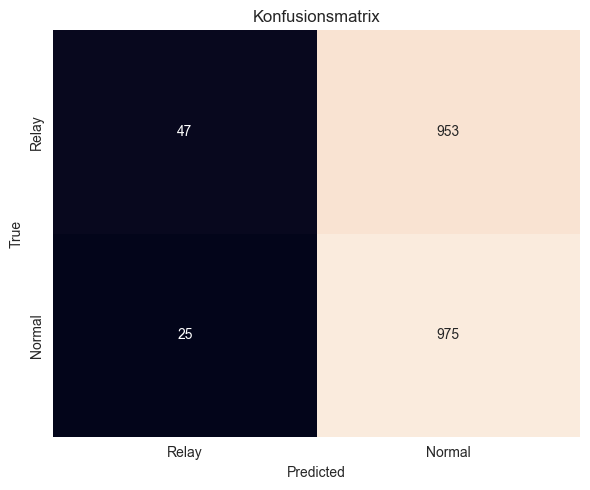

neighbors 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.97      0.66      1000
       Relay       0.63      0.05      0.09      1000

    accuracy                           0.51      2000
   macro avg       0.57      0.51      0.38      2000
weighted avg       0.57      0.51      0.38      2000



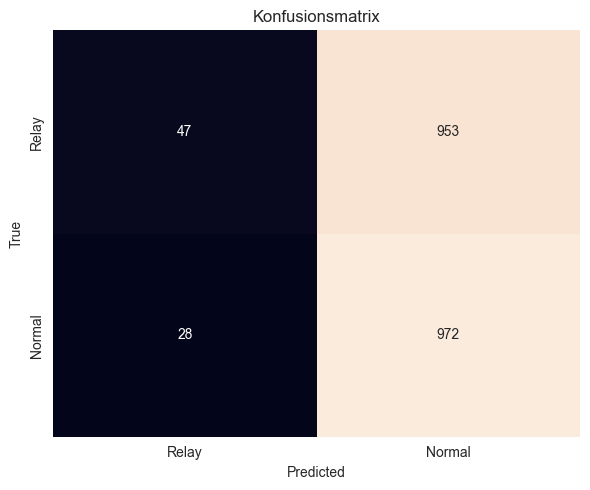

neighbors 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.97      0.67      1000
       Relay       0.64      0.05      0.09      1000

    accuracy                           0.51      2000
   macro avg       0.57      0.51      0.38      2000
weighted avg       0.57      0.51      0.38      2000



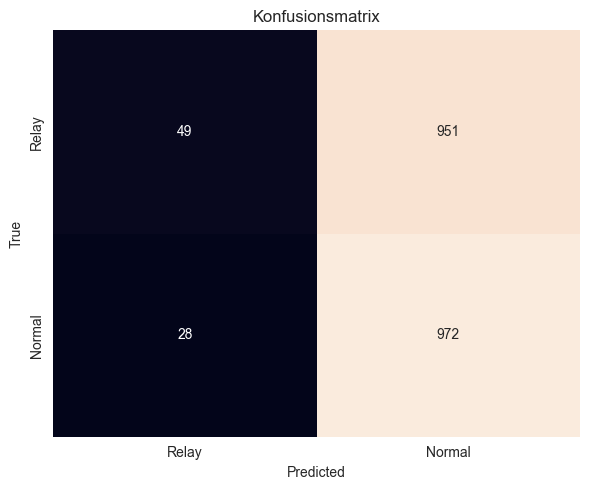

In [6]:
for n in {3,5,10,30}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, scaler=None)
    clf.fit(X_train_scaled_minmax)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_minmax)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"neighbors {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()